In [46]:
from enum import Enum
import requests
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [47]:
class KialoSort(Enum):
  RANK_ACTIVITY = "rank_and_latest_activity"
  VIEW          = "view_count"
  LAST_ACTIVITY = "latest_activity"

class KialoFilter(Enum):
  PROMOTED      = "promoted"
  PARTICIPATE   = "participate"
  LAST_ACTIVITY = "latest_activity"
  TAG           = "tag"
  TAG_ALL       = "tag_all"
  

In [48]:
class KialoTool:
  def getTags(self):
    tags = requests.get("https://www.kialo.com/api/v1/discussiontags")
    return [item['tagName'] for item in tags.json()["tags"]]

  def getDiscussions(self, filter: KialoFilter, sort: KialoSort, limit=3000):
    req = "https://www.kialo.com/api/v1/discussions?filter=" + str(filter.value) + "&sort=" + str(sort.value) + "&limit=" + str(limit) + "&skip=0"
    tags = requests.get(req)
    return tags.json()["discussions"]

  def discussions2urlID(self, discussions, export=False):
    idsUrl = [x["title"].lower().replace("?", "").replace(" ", "-")+"-"+str(x["id"]) for x in discussions]
    tags = [x["tags"] for x in discussions]
    if export:
      pd.DataFrame.from_dict({"kialoUrlId" : idsUrl, "tags" : tags}).to_csv("../../data/kialo/kialo-url-ids.csv")

    return idsUrl

  def getArg(self, discussionId : str):
    return requests.get("https://www.kialo.com/api/v1/discussions/"+discussionId).json()
  


k = KialoTool()

In [49]:
# VIEW
# RANK_ACTIVITY
discussions = k.getDiscussions(KialoFilter.TAG, KialoSort.RANK_ACTIVITY, limit=250)
# export 
k.discussions2urlID(discussions, export=True)

df = pd.DataFrame(discussions)

In [50]:

print(f"Number of discussions: {len(df)}")
print(f"\nColumns in the dataset: {df.columns.tolist()}")

print("\nFirst few rows of the DataFrame:")
df.head()



Number of discussions: 250

Columns in the dataset: ['id', 'title', 'claimAndThesisCount', 'viewCount', 'participantCount', 'contributionCount', 'voteCount', 'created', 'tags', 'isPublic', 'isArchived', 'latestActivity', 'activitiesLastDay', 'activitiesLastWeek', 'image', 'language', 'featured', 'popular', 'trending', 'rank', 'lastSeen', 'effectiveRole', 'followed', 'isFresh', 'accessToken', 'isMultipleChoice', 'groupModeAssignmentMethod']

First few rows of the DataFrame:


,id,title,claimAndThesisCount,viewCount,participantCount,contributionCount,voteCount,created,tags,isPublic,...,popular,trending,rank,lastSeen,effectiveRole,followed,isFresh,accessToken,isMultipleChoice,groupModeAssignmentMethod
0,29355,Are Purity Pledges Harmful?,362,6661,53,1858,800,1560033315324,"[Purity, Sex, Virginity, Feminism, Women]",True,...,False,False,49.0,None,suggester,not-set,False,None,False,nogroups
1,10143,Should American Football Be Banned?,402,13119,115,2501,1947,1520541945850,"[Sports, USA, Football, American_Football, Ent...",True,...,False,False,48.0,None,suggester,not-set,False,None,False,nogroups
2,30339,Should there be One World State?,784,9417,136,2992,1999,1566068458460,"[States, Nations, Culture, Economics, Politics]",True,...,False,False,47.0,None,suggester,not-set,False,None,False,nogroups
3,31027,Do fair trade products cause more good than harm?,202,14215,19,2631,536,1569598153463,"[Trade, Development, International, Ethics]",True,...,False,False,46.0,None,suggester,not-set,False,None,False,nogroups
4,64072,Should failing banks receive bailouts from the...,239,934,7,529,1,1696035598129,"[Economy, Finance, States, Government, Banks, ...",True,...,False,False,45.0,None,suggester,not-set,False,None,False,nogroups



Top 10 tags:
Politics: 49
Ethics: 36
Religion: 30
Society: 30
Philosophy: 27
USA: 21
Education: 21
Law: 19
Economics: 18
Science: 18


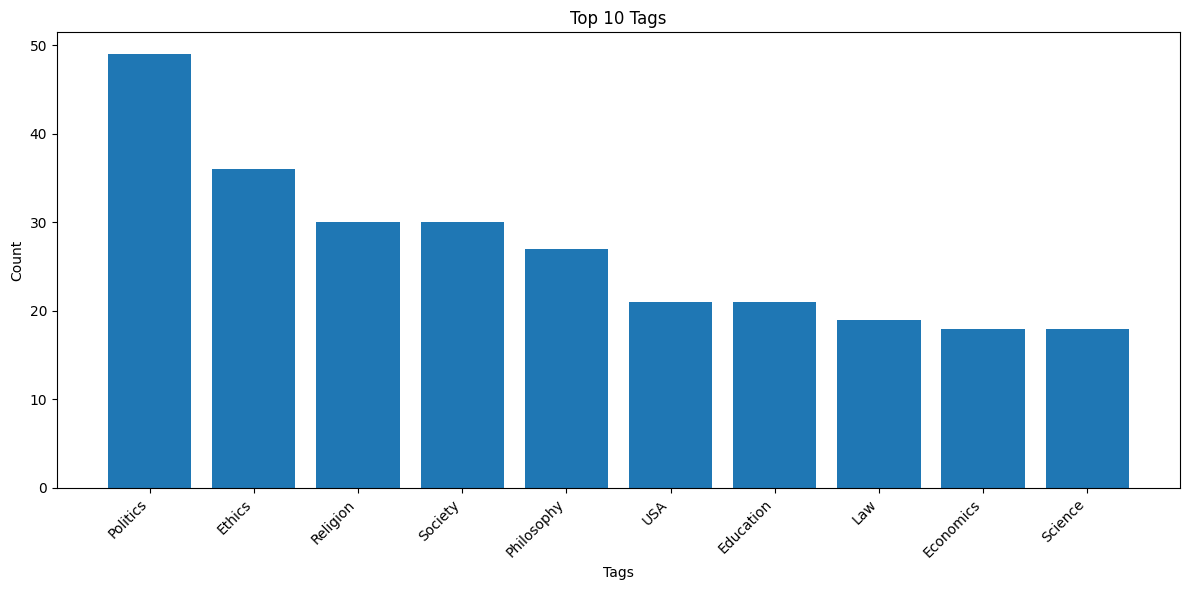

In [51]:
all_tags = [tag for tags in df['tags'] for tag in tags]
tag_counts = Counter(all_tags)
top_10_tags = dict(tag_counts.most_common(10))

print("\nTop 10 tags:")
for tag, count in top_10_tags.items():
    print(f"{tag}: {count}")

plt.figure(figsize=(12, 6))
plt.bar(top_10_tags.keys(), top_10_tags.values())
plt.title("Top 10 Tags")
plt.xlabel("Tags")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Average view count: 22195.94
Median view count: 3604.00
Max view count: 625490
Min view count: 94


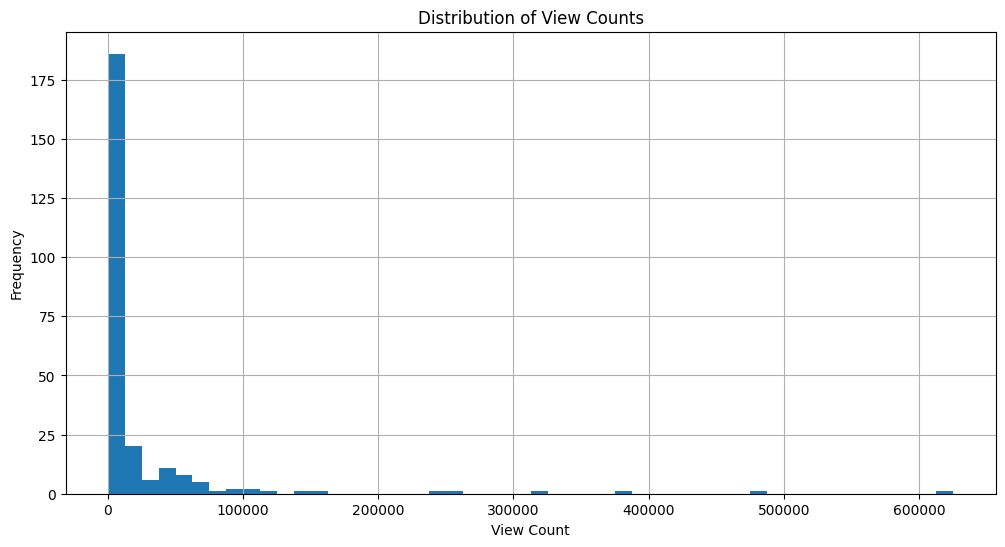

In [52]:
print(f"\nAverage view count: {df['viewCount'].mean():.2f}")
print(f"Median view count: {df['viewCount'].median():.2f}")
print(f"Max view count: {df['viewCount'].max()}")
print(f"Min view count: {df['viewCount'].min()}")

# Visualize view count distribution
plt.figure(figsize=(12, 6))
df['viewCount'].hist(bins=50)
plt.title("Distribution of View Counts")
plt.xlabel("View Count")
plt.ylabel("Frequency")
plt.show()


In [53]:
print(f"\Top 10 most view count")
top10mostview = df.nlargest(10, 'viewCount')
top10mostview

\Top 10 most view count


,id,title,claimAndThesisCount,viewCount,participantCount,contributionCount,voteCount,created,tags,isPublic,...,popular,trending,rank,lastSeen,effectiveRole,followed,isFresh,accessToken,isMultipleChoice,groupModeAssignmentMethod
142,8708,Should the UK Remain in the EU if the only Alt...,1357,625490,1718,15910,11750,1517007214159,"[Brexit, EU, UK, Europe, Politics]",True,...,False,False,NaN,None,suggester,not-set,False,None,False,nogroups
117,5637,Pro-Life vs Pro-Choice: Should Abortion be Legal?,438,486828,2997,26778,18319,1511304193423,"[Feminism, Abortion, Health, Religion, Women, ...",True,...,False,False,NaN,None,suggester,not-set,False,None,False,nogroups
235,8539,Has Religion Been a Good Thing for Humanity?,1258,377341,2618,19982,9494,1516767489526,"[Religion, Society, Ethics, Faith, God]",True,...,False,False,NaN,None,suggester,not-set,False,None,False,nogroups
83,2629,Does God exist?,3545,323004,3134,45697,19262,1503666364589,"[Ethics, Philosophy, LifeAndDeath, Religion, G...",True,...,False,False,NaN,None,suggester,not-set,False,None,False,nogroups
143,16068,Should public nudity be legal?,415,251853,1266,15452,6292,1529093765821,"[Society, Culture, Gender, Law]",True,...,False,False,NaN,None,suggester,not-set,False,None,False,nogroups
205,2762,All Humans Should Be Vegan.,695,241216,2468,45025,15488,1504132186714,"[Health, Vegan, Animals, Ethics, ClimateChange]",True,...,False,False,NaN,None,suggester,not-set,False,None,False,nogroups
221,6079,Was Donald Trump a Good President?,1078,151002,885,11586,4546,1512220674809,"[USA, Trump, Government, Politics, Society, Am...",True,...,False,False,NaN,None,suggester,not-set,False,None,False,nogroups
85,3346,Should the US adopt stricter gun control legis...,523,144762,1957,37147,13564,1507006445040,"[Gun, USA, Violence, Society, Politics, America]",True,...,False,False,NaN,None,suggester,not-set,False,None,False,nogroups
148,6067,Il faut rétablir la peine de mort !,227,120336,86,1163,471,1512176376851,"[Justice, Violence]",True,...,False,False,NaN,None,suggester,not-set,False,None,False,nogroups
220,3371,What is the best religion to believe?,1839,108881,967,31837,8302,1507045089880,"[Religion, Christianity, Islam, Judaism, Philo...",True,...,False,False,NaN,None,suggester,not-set,False,None,True,nogroups


In [54]:
print("\nGeneral statistics for numeric columns:")
df.describe()


General statistics for numeric columns:


,id,claimAndThesisCount,viewCount,participantCount,contributionCount,voteCount,created,activitiesLastDay,activitiesLastWeek,featured,rank
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000,250.000000,49.00000,49.00000
mean,32965.716000,267.908000,22195.940000,207.124000,2986.628000,1246.624000,1.583917e+12,0.028000,0.188000,24.00000,25.00000
std,22514.268261,364.782451,65392.558904,450.530295,6253.044418,3151.419573,7.086171e+10,0.340116,1.314369,14.28869,14.28869
min,801.000000,7.000000,94.000000,2.000000,8.000000,0.000000,1.408654e+12,0.000000,0.000000,0.00000,1.00000
25%,10111.500000,60.750000,724.500000,11.000000,235.250000,4.000000,1.520499e+12,0.000000,0.000000,12.00000,13.00000
50%,30966.500000,170.500000,3604.000000,36.500000,803.000000,103.000000,1.569306e+12,0.000000,0.000000,24.00000,25.00000
75%,57533.500000,345.000000,12673.000000,156.250000,2655.250000,692.750000,1.647000e+12,0.000000,0.000000,36.00000,37.00000
max,66644.000000,3545.000000,625490.000000,3134.000000,45697.000000,22067.000000,1.726253e+12,5.000000,16.000000,48.00000,49.00000


In [55]:
arg = k.getArg("29355")
arg

{'discussion': {'id': 29355,
  'isMultipleChoice': False,
  'created': 1560033315324,
  'image': '141438ab-f9e0-4926-834a-5728c3b42302',
  'hasDefaultImage': False,
  'language': 'en',
  'isPublic': True,
  'isIndexed': True,
  'title': 'Are Purity Pledges Harmful?',
  'backgroundInfo': 'A [purity pledge](https://en.wikipedia.org/wiki/Virginity_pledge) is a commitment to abstain from sex until marriage, usually undertaken by teenagers. The first organization to promote purity pledges was [True Love Waits](https://en.wikipedia.org/wiki/True_Love_Waits), a subsidiary of Life Way Christian Resources, which began conducting virginity pledges in 1993 at a Baptist church in Tennessee. Today, True Love Waits and [Silver Ring Thing](https://en.wikipedia.org/wiki/Silver_Ring_Thing) are two of the largest purity pledge programs, with more than [one million](https://www.encyclopedia.com/religion/legal-and-political-magazines/true-love-waits) young adults having signed up for them.\n \nProponents 

In [56]:
kialoUsername = "majat47000"
secret      = "majat47000@chainds.com"

In [57]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
from tqdm import tqdm

def downloadDiscussions(disscusionUrlIds):
  path = os.path.abspath("../../data/kialo/debates")


  prefs = {"download.default_directory": path }
  options = Options()
  options.add_experimental_option("prefs", prefs)
  driver = webdriver.Chrome(options = options)


  driver.get("https://www.kialo.com/login")

  #Login
  id          = driver.find_element(By.ID, "emailOrUsername")
  password    = driver.find_element(By.ID, "password")
  loginButton = driver.find_element(By.CLASS_NAME, "login-form__submit")
  id.send_keys(kialoUsername)
  password.send_keys(secret)

  loginButton.click()

  myElem = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'l-10-n-text')))


  for urlId in tqdm(disscusionUrlIds):
    driver.get("https://www.kialo.com/export/" + urlId + ".txt")
    time.sleep(1.5)

In [58]:
#downloadDiscussions(k.discussions2urlID(discussions, export=True))

100%|██████████| 250/250 [07:20<00:00,  1.76s/it]
